In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**데이터 구조 파악

In [4]:
df = pd.read_csv('online_gaming_behavior.csv')
df.shape

(40034, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [6]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


**데이터 전처리

<Axes: xlabel='Age', ylabel='Count'>

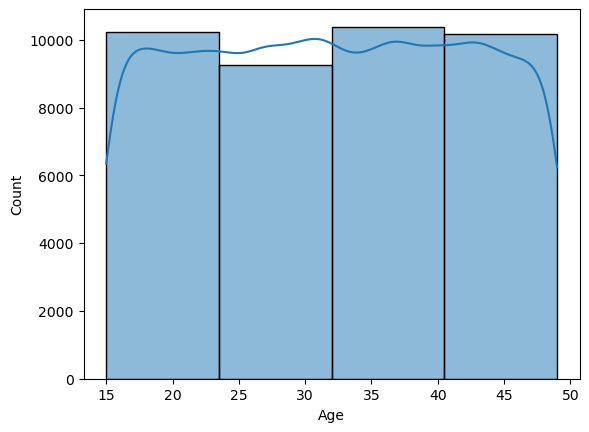

In [7]:
sns.histplot(df['Age'], bins = 4, kde = True)

<Axes: xlabel='PlayTimeHours', ylabel='Count'>

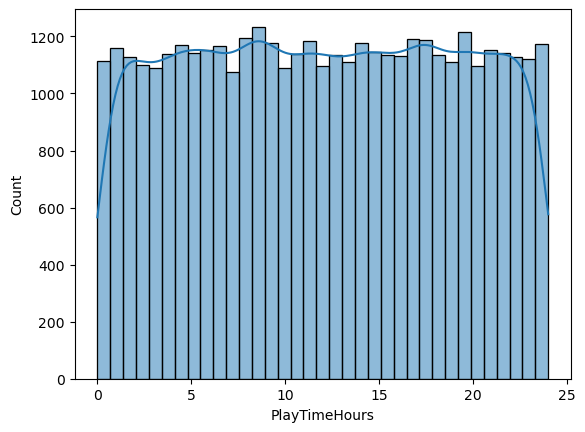

In [8]:
sns.histplot(df['PlayTimeHours'], kde = True)

<Axes: xlabel='AvgSessionDurationMinutes', ylabel='Count'>

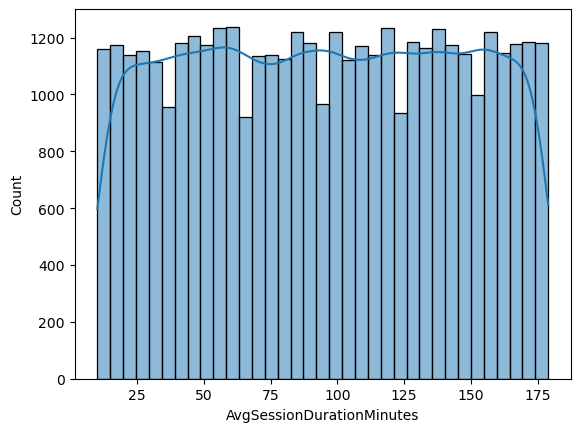

In [9]:
sns.histplot(df['AvgSessionDurationMinutes'], kde = True)

<Axes: xlabel='AchievementsUnlocked', ylabel='Count'>

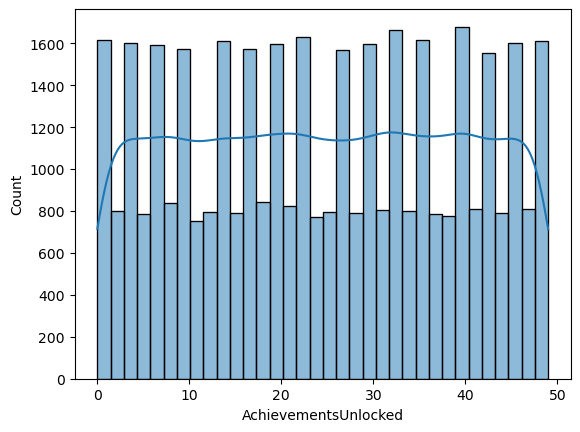

In [10]:
sns.histplot(df['AchievementsUnlocked'], kde = True)

<Axes: xlabel='PlayerLevel', ylabel='Count'>

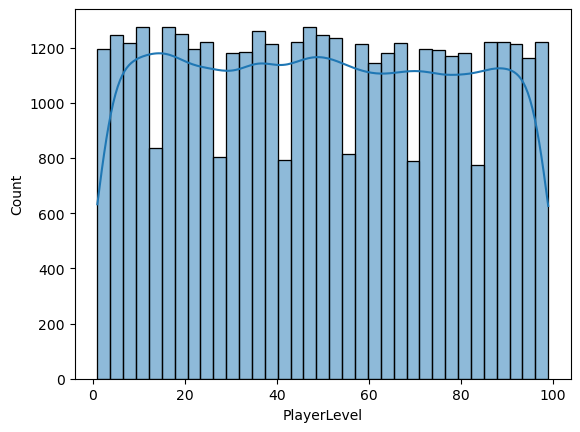

In [11]:
sns.histplot(df['PlayerLevel'], kde = True)

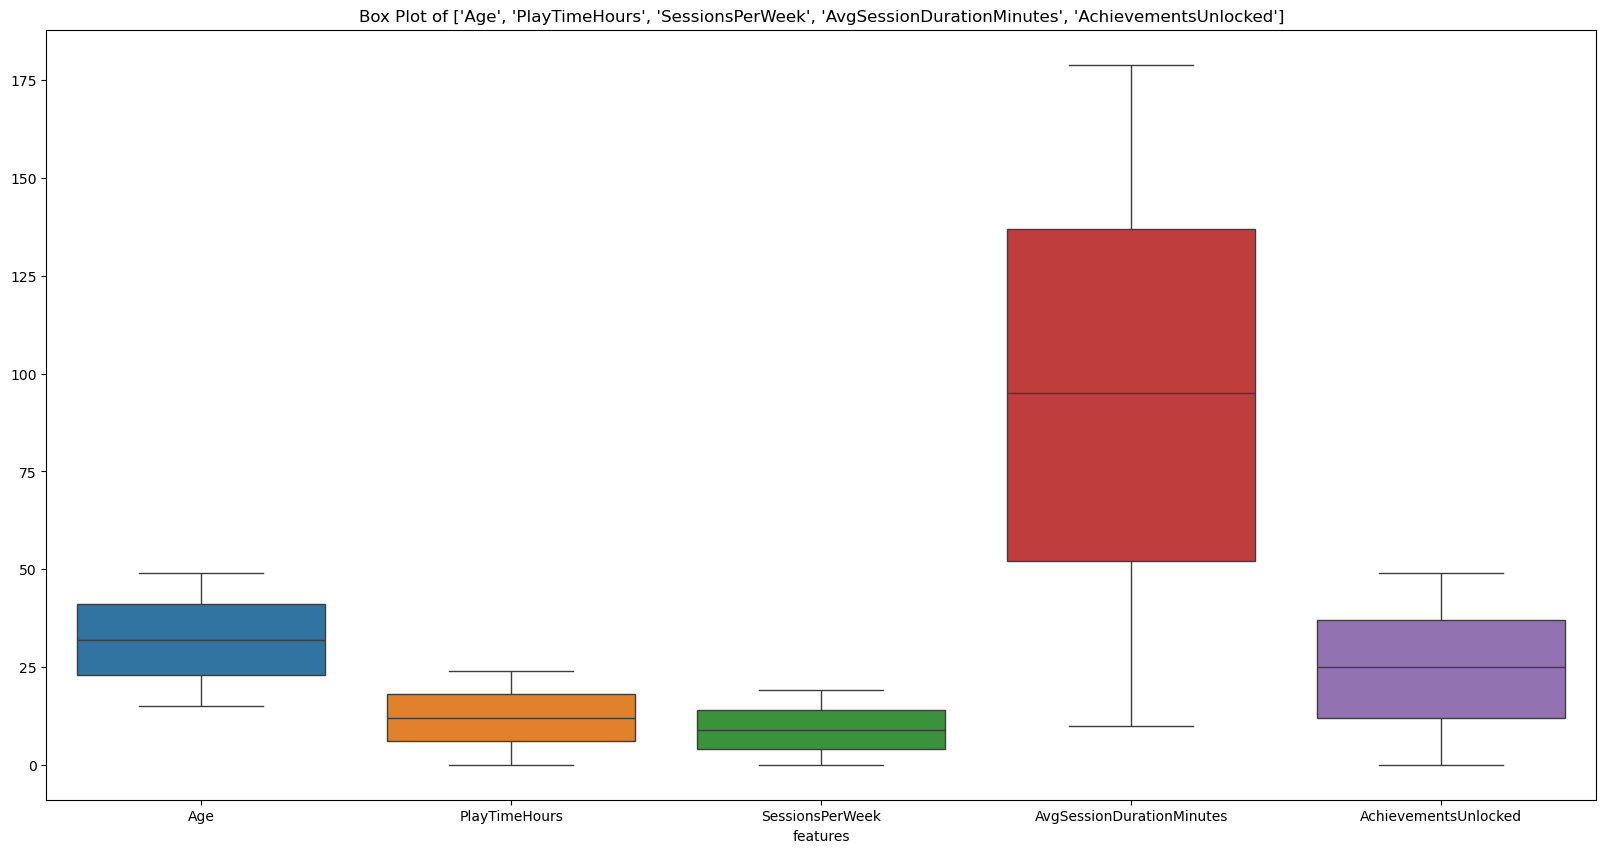

In [12]:
plt.figure(figsize = (20,10))

for col in [['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked']]:
    sns.boxplot(df[col])
    plt.xlabel('features')
    plt.title(f'Box Plot of {col}')
    plt.show()

In [13]:
for col in [['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    condition1 = df[col] < lower_limit
    condition2 = df[col] > upper_limit

In [14]:
df['Age_Group'] = pd.cut(df['Age'], bins = [10, 20, 30, 40, 50], right = False, 
                         labels = ['10s', '20s', '30s', '40s'])

df['Age_Group'] = df['Age_Group'].astype('str')

In [15]:
def Engagement_Rank (EngagementLevel):
    if EngagementLevel == 'High':
        return 3
    elif EngagementLevel == 'Medium':
        return 2
    else:
        return 1
    
df['Engagement_Rank'] = df['EngagementLevel'].apply(Engagement_Rank)

In [16]:
def Genre_Category (Genre):
    if Genre == 'Action':
        return 1
    elif Genre == 'RPG':
        return 2
    elif Genre == 'Simulation':
        return 3
    elif Genre == 'Sports':
        return 4
    elif Genre == 'Strategy':
        return 5
    
df['Genre_Categry'] = df['GameGenre'].apply(Genre_Category)

**변수 상관관계 분석

In [17]:
df_for_corr = df.drop(columns = ['PlayerID', 'Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel', 'Age_Group'])
df_for_corr.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Engagement_Rank,Genre_Categry
0,43,16.271119,0,6,108,79,25,2,5
1,29,5.525961,0,5,144,11,10,2,5
2,22,8.223755,0,16,142,35,41,3,4
3,35,5.265351,1,9,85,57,47,2,1
4,33,15.531945,0,2,131,95,37,2,1


In [18]:
Corr_Matrix = df_for_corr.corr()

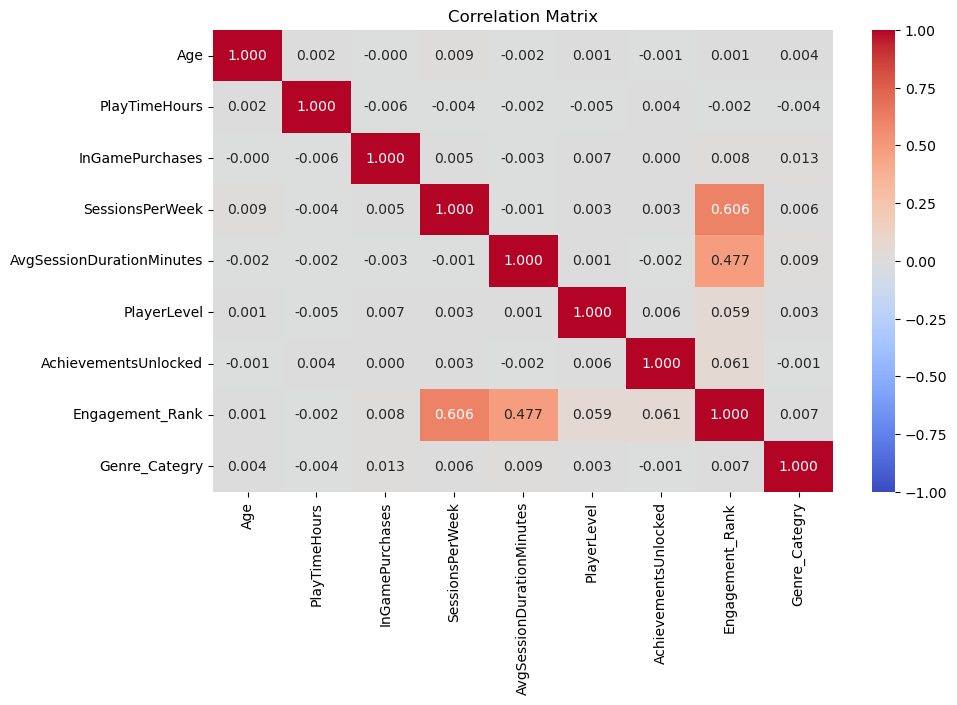

In [19]:
plt.figure(figsize = (10, 6))
sns.heatmap(Corr_Matrix, vmax = 1, vmin = -1, center = 0, fmt = '0.3f', annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df_corr = Corr_Matrix['InGamePurchases'].drop('InGamePurchases').sort_values(ascending = False)
df_corr

Genre_Categry                0.012843
Engagement_Rank              0.008209
PlayerLevel                  0.006524
SessionsPerWeek              0.005132
AchievementsUnlocked         0.000098
Age                         -0.000186
AvgSessionDurationMinutes   -0.003059
PlayTimeHours               -0.006067
Name: InGamePurchases, dtype: float64

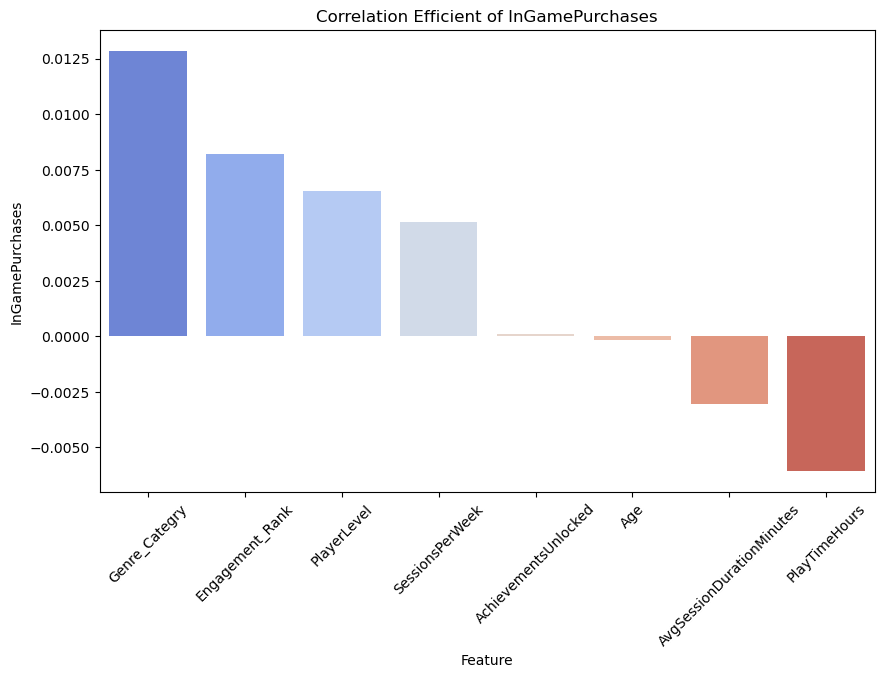

In [21]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_corr.reset_index(), x = 'index', y = 'InGamePurchases', hue = 'index', palette = 'coolwarm', legend = False)
plt.xlabel('Feature')
plt.ylabel('InGamePurchases')
plt.title('Correlation Efficient of InGamePurchases')
plt.xticks(rotation = 45)
plt.show()

**카테고리 별 데이터 분석 (Age)

In [22]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Age_Group,Engagement_Rank,Genre_Categry
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,40s,2,5
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,20s,2,5
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,20s,3,4
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,30s,2,1
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,30s,2,1


In [23]:
age_group_purchase_df = df.groupby('Age_Group')['InGamePurchases'].mean().reset_index()
age_group_purchase_df

,Age_Group,InGamePurchases
0,10s,0.203899
1,20s,0.200158
2,30s,0.198374
3,40s,0.202548


**카테고리 별 데이터 분석 (Genre)

In [24]:
genre_group_purchase_df = df.groupby('GameGenre')['InGamePurchases'].mean().reset_index()
genre_group_purchase_df

,GameGenre,InGamePurchases
0,Action,0.193183
1,RPG,0.198189
2,Simulation,0.201679
3,Sports,0.201541
4,Strategy,0.209685


**카테고리 별 데이터 분석 (Age, Genre)

In [25]:
age_genre_group_ptime_df = df.groupby(['Age_Group','GameGenre'])['InGamePurchases'].mean().reset_index()
age_genre_group_ptime_df

,Age_Group,GameGenre,InGamePurchases
0,10s,Action,0.192342
1,10s,RPG,0.199001
2,10s,Simulation,0.221925
3,10s,Sports,0.201040
4,10s,Strategy,0.205667
5,20s,Action,0.184289
6,20s,RPG,0.200725
7,20s,Simulation,0.201417
8,20s,Sports,0.201325
9,20s,Strategy,0.213391


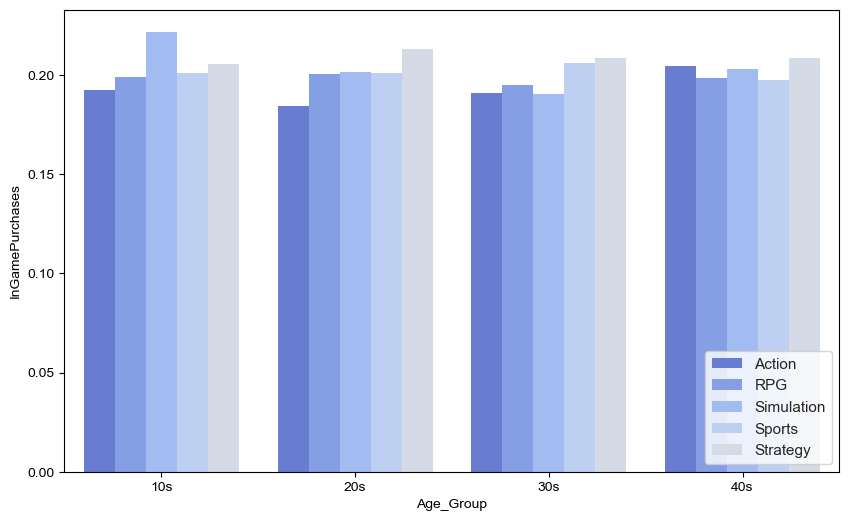

In [26]:
plt.figure(figsize = (10, 6))
palette3 = sns.color_palette('coolwarm', 10)
sns.barplot(data = age_genre_group_ptime_df, x = 'Age_Group', y = 'InGamePurchases', hue = 'GameGenre', palette= palette3)
sns.set(style="whitegrid", color_codes=True)
plt.legend(loc='lower right')

**카테고리 별 데이터 분석 (Location, Genre)

In [27]:
loc_genre_group_igp_df = df.groupby(['Location','GameGenre'])['InGamePurchases'].mean().reset_index()
loc_genre_group_igp_df 

,Location,GameGenre,InGamePurchases
0,Asia,Action,0.204710
1,Asia,RPG,0.204321
2,Asia,Simulation,0.197782
3,Asia,Sports,0.202276
4,Asia,Strategy,0.216233
5,Europe,Action,0.200577
6,Europe,RPG,0.200253
7,Europe,Simulation,0.200083
8,Europe,Sports,0.205677
9,Europe,Strategy,0.211106


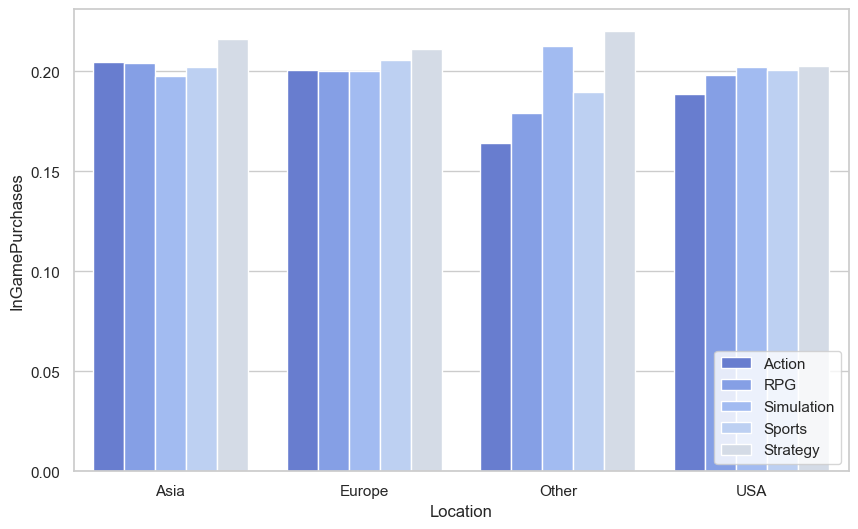

In [28]:
plt.figure(figsize = (10, 6))
sns.barplot(data = loc_genre_group_igp_df, x = 'Location', y = 'InGamePurchases', hue = 'GameGenre', palette= palette3)
sns.set(style="whitegrid", color_codes=True)
plt.legend(loc='lower right')

**랜덤포레스트 모델 (인게임 구매 예측)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
X = df.drop(columns = ['PlayerID', 'Location', 'GameGenre', 'Gender', 'InGamePurchases', 'GameDifficulty', 'EngagementLevel', 'Age_Group'])
y = df['InGamePurchases']

In [31]:
X

,Age,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Engagement_Rank,Genre_Categry
0,43,16.271119,6,108,79,25,2,5
1,29,5.525961,5,144,11,10,2,5
2,22,8.223755,16,142,35,41,3,4
3,35,5.265351,9,85,57,47,2,1
4,33,15.531945,2,131,95,37,2,1
...,...,...,...,...,...,...,...,...
40029,32,20.619662,4,75,85,14,2,5
40030,44,13.539280,19,114,71,27,3,3
40031,15,0.240057,10,176,29,1,3,2
40032,34,14.017818,3,128,70,10,2,4


In [32]:
y.value_counts()

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

**데이터 불균형 해결: 가중치 부가

In [34]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4, class_weight = 'balanced')

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4)

In [36]:
y_predict = model.predict(X_test)
y_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65      6334
           1       0.20      0.44      0.28      1673

    accuracy                           0.52      8007
   macro avg       0.50      0.49      0.46      8007
weighted avg       0.67      0.52      0.57      8007



In [38]:
importance = model.feature_importances_
importance

array([0.1148135 , 0.24012005, 0.12619454, 0.14698706, 0.16398405,
       0.11368507, 0.03532224, 0.05889349])

([<matplotlib.axis.XTick at 0x29821e3d610>,
 [Text(0, 0, 'Engagement_Rank'),
  Text(1, 0, 'Genre_Categry'),
  Text(2, 0, 'AchievementsUnlocked'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SessionsPerWeek'),
  Text(5, 0, 'AvgSessionDurationMinutes'),
  Text(6, 0, 'PlayerLevel'),
  Text(7, 0, 'PlayTimeHours')])

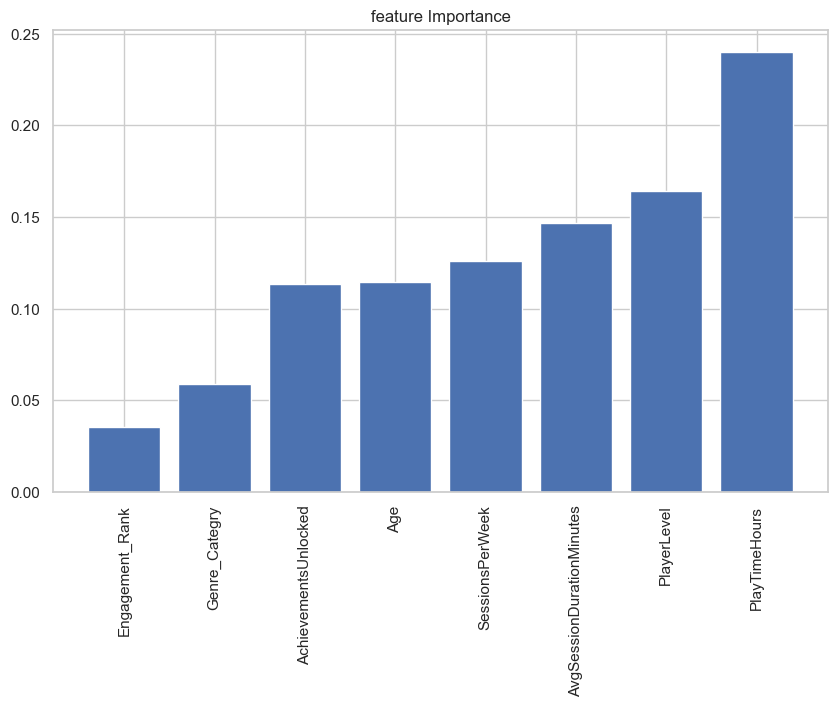

In [39]:
data_sorted = np.argsort(importance) #np.argsort는 데이터의 순서를 잡아줌 

plt.figure(figsize = (10, 6))
plt.title('feature Importance')
plt.bar(range(len(importance)), importance[data_sorted]) #np.argsort를 원래 데이터에 적용하면 크기 순서로 반영
plt.xticks(range(len(importance)), X.columns[data_sorted], rotation = 90) 

**데이터 불균형 해결: SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train) 

In [42]:
print('SMOTE 적용전', X_train.shape, y_train.shape)
print('SMOTE 적용후', X_train_over.shape, y_train_over.shape)

SMOTE 적용전 (32027, 8) (32027,)
SMOTE 적용후 (51318, 8) (51318,)


In [43]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4)
model.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=4)

In [44]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54      6334
           1       0.21      0.59      0.31      1673

    accuracy                           0.44      8007
   macro avg       0.50      0.50      0.42      8007
weighted avg       0.67      0.44      0.49      8007



In [46]:
importance = model.feature_importances_
importance

array([0.10199869, 0.08595051, 0.17733471, 0.03381202, 0.02462362,
       0.05560297, 0.08498772, 0.43568977])

([<matplotlib.axis.XTick at 0x2982175db10>,
 [Text(0, 0, 'PlayerLevel'),
  Text(1, 0, 'AvgSessionDurationMinutes'),
  Text(2, 0, 'AchievementsUnlocked'),
  Text(3, 0, 'Engagement_Rank'),
  Text(4, 0, 'PlayTimeHours'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'SessionsPerWeek'),
  Text(7, 0, 'Genre_Categry')])

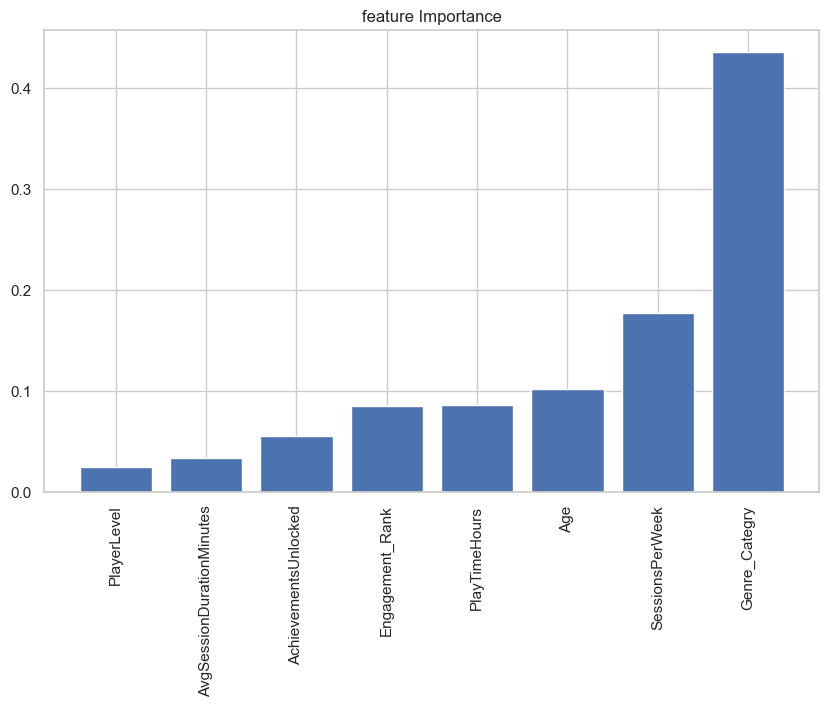

In [47]:
data_sorted = np.argsort(importance) #np.argsort는 데이터의 순서를 잡아줌 

plt.figure(figsize = (10, 6))
plt.title('feature Importance')
plt.bar(range(len(importance)), importance[data_sorted]) #np.argsort를 원래 데이터에 적용하면 크기 순서로 반영
plt.xticks(range(len(importance)), X.columns[data_sorted], rotation = 90) 

**하이퍼파라미터

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [50]:
# 하이퍼 파라미터 초기 설정
param_grid = {
    'n_estimators': [50, 100, 200], #랜덤포레스트의 갯수
    'max_depth': [5, 10, 15], #깊이
}

In [51]:
model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

In [52]:
grid_search = GridSearchCV(model, param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_predict = best_model.predict(X_test)
y_predict

In [ ]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_predict))

In [ ]:
importance = best_model.feature_importances_
importance

In [ ]:
data_sorted = np.argsort(importance) #np.argsort는 데이터의 순서를 잡아줌 

plt.figure(figsize = (10, 6))
plt.title('feature Importance')
plt.bar(range(len(importance)), importance[data_sorted]) #np.argsort를 원래 데이터에 적용하면 크기 순서로 반영
plt.xticks(range(len(importance)), X.columns[data_sorted], rotation = 90) 

**로지스틱 회귀 (분류)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)

In [ ]:
X = df.drop(columns = ['PlayerID', 'Location', 'GameGenre', 'Gender', 'InGamePurchases', 'GameDifficulty', 'EngagementLevel', 'Age_Group'])
y = df['InGamePurchases']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train) 

In [ ]:
X_train_over.shape

In [ ]:
y_train_over.value_counts()

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_over, y_train_over)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

In [ ]:
params = {'penalty':['l2', 'l1'], 'C': [0.01, 0.1, 1, 5, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(model, param_grid = params, cv = 3) 

In [ ]:
grid_clf.fit(X_train_over, y_train_over)

In [ ]:
best_model = grid_clf.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))